# Homework 8
## Regression
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

In [97]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [98]:
file_name = 'EmployeeSalaryRegression.csv'
df = pd.read_csv(file_name)
df.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome'],
      dtype='object')

### Q1
#### Regression model between TotalWorkingYears and MonthlyIncome


In [99]:
x = df.drop(['MonthlyIncome'], axis=1)
model = sm.OLS(df['MonthlyIncome'], sm.add_constant(x['TotalWorkingYears'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          2.73e-292
Time:                        23:02:24   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of R-squared is not close to 0 or 1 so we cannot say that the model is good or bad. However there is one thing which can be said that model is relatively good and can be used to for prediction.
P-values are also less than 0.05 which means we have greater than 95% confidence interval, thus we are very confident with the result. 
The Co-efficient shows the increase in x results in increase of 467 units in y. This is the gradient in y = mx + c line. As this is positive which means that for every x,  y is increased.  


Text(0, 0.5, 'MonthlyIncome')

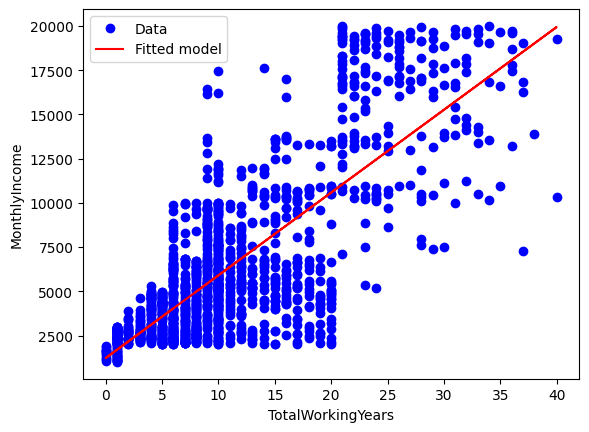

In [100]:
# Scatterplot for above model is as follows:
plt.plot(df['TotalWorkingYears'], df['MonthlyIncome'], 'bo')
plt.plot(df['TotalWorkingYears'], model.fittedvalues, 'r')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')


### Q2

Regression model between Age and DistanceFromHome


In [101]:
x = df.drop(['DistanceFromHome'], axis=1)
model = sm.OLS(df['DistanceFromHome'], sm.add_constant(x['Age'])).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.948
Time:                        23:02:25   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The value of R-squared is 0 which means that the model is not good. And since the p-value is greater than 0.05 which means that we are not confident with the result. The co-efficient is also close to 0 which means that there is no relation between x and y.

Text(0, 0.5, 'DistanceFromHome')

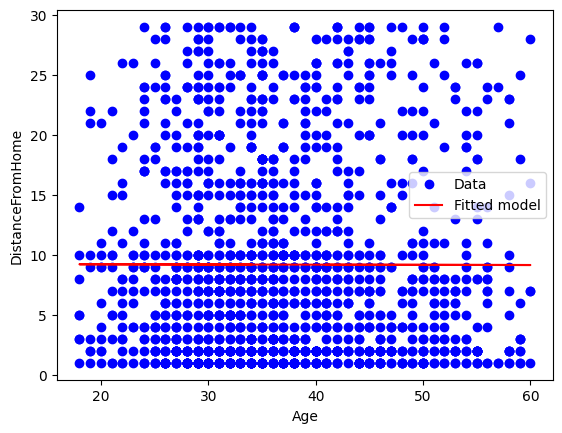

In [102]:
plt.plot(df['Age'], df['DistanceFromHome'], 'bo')
plt.plot(df['Age'], model.fittedvalues, 'r')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

### Q3

Corelation for Q1 and Q2

In [103]:
corr1 = df['MonthlyIncome'].corr(df['TotalWorkingYears'])
print(f'Corelation for Q1 is {corr1}')
corr2 = df['Age'].corr(df['DistanceFromHome'])
print(f'Corelation for Q2 is {corr2}')

Corelation for Q1 is 0.7728932462543564
Corelation for Q2 is -0.0016861201480870183


As we can see that Corelation for Q1 is near to +1 which mean that there is a fairly strong relationship between both variables. The evidence of it can be easily seen in the Q1 Scatterplot which gives us straight line with positive gradient. It is not completely zero which can also be seen as the data points are somewhat sparsed to fiited line. 

About the corelation of Q2, it is close to 0, which shows no relationship between both variables. This can also be proved using Scatterplot for Q2 as the best fitted line is straight with '0' gradient. 

### Q4

Regression model for MonthlyIncome

In [104]:
# Now for all Other inputs, while adding the constants we specially dont have to add the value of x on which we have to put a condition. 
# Before sending out this to Predict Model, we will first have to do the hotEncoding

onehot = pd.get_dummies(df, columns=[
                        'MaritalStatus', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime'])

x = onehot.drop(['MonthlyIncome'], axis = 1)
model = sm.OLS(onehot['MonthlyIncome'], sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     715.9
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:02:25   Log-Likelihood:                -12394.
No. Observations:                1470   AIC:                         2.486e+04
Df Residuals:                    1435   BIC:                         2.504e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               364.2019    129.213      2.819      0.005     110.735     617.669
Age                                  -5.3357      4.614     -1.156      0.248     -14.386       3.715
DistanceFromHome                     -4.8212      3.650     -1.321      0.187     -11.981       2.339
Education                           -11.1578     29.743     -0.375      0.708     -69.502      47.186
HourlyRate                            1.3410      1.454      0.923      0.356      -1.511       4.193
JobLevel                           2759.6363     67.718     40.752      0.000    2626.800    2892.473
NumCompaniesWorked                   11.5087     13.246      0.869      0.385     -14.475      37.493
PerformanceRating                   -29.6861     81.840     -0.363      0.717    -190.225     130.853
StockOptionLevel                    -42.3557     47.499     -0.892      0.373    -135.530      50.818
TotalWorkingYears                    48.0088      8.316      5.773      0.000      31.696      64.321
TrainingTimesLastYear               -16.7479     23.135     -0.724      0.469     -62.130      28.634
WorkLifeBalance                     -22.7978     42.025     -0.542      0.588    -105.235      59.640
YearsAtCompany                        6.6563     10.392      0.641      0.522     -13.729      27.041
YearsInCurrentRole                    1.2712     13.482      0.094      0.925     -25.175      27.717
YearsSinceLastPromotion              23.3883     11.880      1.969      0.049       0.084      46.693
YearsWithCurrManager                -34.1053     13.789     -2.473      0.013     -61.154      -7.057
MaritalStatus_Divorced              110.9276     73.613      1.507      0.132     -33.474     255.329
MaritalStatus_Married               162.0571     59.777      2.711      0.007      44.798     279.317
MaritalStatus_Single                 91.2173     70.939      1.286      0.199     -47.937     230.372
Department_Human Resources            9.7448    276.725      0.035      0.972    -533.084     552.574
Department_Research & Development   257.1010    170.358      1.509      0.131     -77.077     591.279
Department_Sales                     97.3561    186.808      0.521      0.602    -269.090     463.802
EducationField_Human Resources      114.4753    242.487      0.472      0.637    -361.192     590.143
EducationField_Life Sciences         38.6894     72.369      0.535      0.593    -103.270     180.649
EducationField_Marketing            104.4560    110.500      0.945      0.345    -112.303     321.215
EducationField_Medical               28.7257     76.079      0.378      0.706    -120.513     177.964
EducationField_Other                -46.9271    120.714     -0.389      0.698    -283.722     189.868
EducationField_Technica

In [105]:
significant_inputs = model.pvalues.drop('const').sort_values().head(3).index
least_significant_inputs = model.pvalues.drop('const').sort_values().tail(3).index

print("Most significant inputs:\n", significant_inputs)

print("Least significant inputs:\n", least_significant_inputs)

Most significant inputs:
 Index(['JobLevel', 'JobRole_Manager', 'JobRole_Research Director'], dtype='object')
Least significant inputs:
 Index(['PerformanceRating', 'YearsInCurrentRole',
       'Department_Human Resources'],
      dtype='object')


Judging by the R-squared value, it's evident that the model exhibits a high level of effectiveness, accounting for nearly 94.4% of the variance within the dataset. When examining the significance of various variables, we can identify the top three as follows:

1. JobLevel
2. JobRoles
3. TotalWorkingYears

The specific Job roles are specified above, but considering almost all Job roles have p-value less than 0.05, we can savely assume Job Roles to be a significant variable.

Conversely, the following three variables emerge as the least influential:

1. YearsInCurrentRole
2. Department
3. PerformanceRating

It's worth mentioning that the vast majority of the Departments exhibit p-values well above 0.05, reinforcing the assertion that Department should be regarded as the third least significant input.

In [106]:
newData = pd.DataFrame({
    'Age': [16], 
    'Department': ['Sales'],
    'DistanceFromHome': [54],
    'Education': [3],
    'EducationField': ['Other'],
    'Gender': ['Male'],
    'HourlyRate': [55],
    'JobLevel': [2],
    'JobRole': ['Laboratory Technician'],
    'MaritalStatus': ['Married'],
    'NumCompaniesWorked': [2],
    'OverTime': ['No'],
    'PerformanceRating': [3],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [7],
    'TrainingTimesLastYear': [5],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [2],
    'YearsInCurrentRole': [2],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [2]
    })
catcols = df.select_dtypes(exclude=['int', 'float']).columns.tolist()
newData = pd.concat([df, newData], ignore_index=True)
newData = newData.drop(['MonthlyIncome'], axis=1)
data2 = pd.get_dummies(newData, columns=[i for i in catcols])
data2 = sm.add_constant(data2)
newData = data2.tail(1)

model.predict(newData)

1470    5519.541125
dtype: float64

The predicted MonthlyIncome is 5519.54

### Q5

Regression model to predict HourlyRate

In [107]:
onehot = pd.get_dummies(df, columns=[
                        'MaritalStatus', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime'])


x = onehot.drop(['HourlyRate'], axis=1)
y = onehot['HourlyRate']
model = sm.OLS(y, sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6846
Date:                Wed, 08 Nov 2023   Prob (F-statistic):              0.916
Time:                        23:02:25   Log-Likelihood:                -6501.3
No. Observations:                1470   AIC:                         1.307e+04
Df Residuals:                    1435   BIC:                         1.326e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                21.8033      2.281      9.560      0.000      17.329      26.277
Age                                   0.0632      0.084      0.754      0.451      -0.101       0.228
DistanceFromHome                      0.0797      0.066      1.203      0.229      -0.050       0.210
Education                             0.2087      0.540      0.386      0.699      -0.851       1.268
JobLevel                             -3.1841      1.804     -1.765      0.078      -6.722       0.354
NumCompaniesWorked                    0.1083      0.241      0.450      0.653      -0.364       0.580
PerformanceRating                    -0.3151      1.486     -0.212      0.832      -3.230       2.599
StockOptionLevel                      1.4108      0.862      1.637      0.102      -0.280       3.101
TotalWorkingYears                     0.0492      0.153      0.322      0.747      -0.250       0.349
TrainingTimesLastYear                -0.0827      0.420     -0.197      0.844      -0.907       0.741
WorkLifeBalance                       0.1144      0.763      0.150      0.881      -1.382       1.611
YearsAtCompany                        0.0478      0.189      0.253      0.800      -0.322       0.418
YearsInCurrentRole                   -0.1133      0.245     -0.463      0.643      -0.593       0.367
YearsSinceLastPromotion              -0.1686      0.216     -0.781      0.435      -0.592       0.255
YearsWithCurrManager                 -0.0090      0.251     -0.036      0.972      -0.501       0.483
MonthlyIncome                         0.0004      0.000      0.923      0.356      -0.000       0.001
MaritalStatus_Divorced                6.2656      1.327      4.721      0.000       3.662       8.869
MaritalStatus_Married                 7.9803      1.067      7.476      0.000       5.886      10.074
MaritalStatus_Single                  7.5574      1.273      5.936      0.000       5.060      10.055
Department_Human Resources            7.7458      5.020      1.543      0.123      -2.101      17.592
Department_Research & Development     6.3040      3.091      2.040      0.042       0.241      12.367
Department_Sales                      7.7535      3.386      2.290      0.022       1.112      14.395
EducationField_Human Resources       -1.5980      4.402     -0.363      0.717     -10.234       7.038
EducationField_Life Sciences          5.9413      1.305      4.554      0.000       3.382       8.500
EducationField_Marketing              5.6866      2.001      2.842      0.005       1.761       9.612
EducationField_Medical                4.2543      1.377      3.090      0.002       1.554       6.955
EducationField_Other                  1.6687      2.191      0.762      0.446      -2.630       5.967
EducationField_Technica

In [108]:
significant_inputs = model.pvalues.drop('const').sort_values().head(3).index
least_significant_inputs = model.pvalues.drop('const').sort_values().tail(3).index

print("Most significant inputs:\n", significant_inputs)

print("Least significant inputs:\n", least_significant_inputs)

Most significant inputs:
 Index(['Gender_Male', 'OverTime_No', 'Gender_Female'], dtype='object')
Least significant inputs:
 Index(['TrainingTimesLastYear', 'WorkLifeBalance', 'YearsWithCurrManager'], dtype='object')


Judging by the R-squared value, it's evident that the model exhibits a high level of effectiveness, accounting for nearly 98.4% of the variance within the dataset. When examining the significance of various variables, we can identify the top three as follows:

1. Gender 
2. OverTime
3. Marital Status

Conversely, the following three variables emerge as the least influential:

1. YearsWithCurrManager
2. TrainingTimesLastYear
3. WorkLifeBalance

In [109]:
newData = pd.DataFrame({
    'Age': [23], 
    'Department': ['Research & Development'],
    'DistanceFromHome': [6],
    'Education': [3],
    'EducationField': ['Other'],
    'Gender': ['Male'],
    'MonthlyIncome' : [4978],
    'JobLevel': [2],
    'JobRole': ['Laboratory Technician'],
    'MaritalStatus': ['Married'],
    'NumCompaniesWorked': [2],
    'OverTime': ['No'],
    'PerformanceRating': [3],
    'StockOptionLevel': [0],
    'TotalWorkingYears': [7],
    'TrainingTimesLastYear': [5],
    'WorkLifeBalance': [3],
    'YearsAtCompany': [2],
    'YearsInCurrentRole': [2],
    'YearsSinceLastPromotion': [1],
    'YearsWithCurrManager': [2]
    })

newData = pd.concat([df, newData], ignore_index=True)
newData = newData.drop(['HourlyRate'], axis=1)
data3 = pd.get_dummies(newData, columns=[i for i in catcols])
data3 = sm.add_constant(data3)
newData = data3.tail(1)

model.predict(newData)

1470    58.350479
dtype: float64

The value for hourly rate comes out to be 60.1, however this value is still not the most accurate.

### Q6

Regression model to predict MonthlyIncome using the best inputs from Q4

In [110]:
df1 = pd.get_dummies(df, columns=[i for i in catcols])
x = df1[["JobLevel", "TotalWorkingYears", "JobRole_Healthcare Representative", "JobRole_Human Resources", "JobRole_Laboratory Technician", "JobRole_Manager", "JobRole_Manufacturing Director", "JobRole_Research Director", "JobRole_Research Scientist", "JobRole_Sales Executive", "JobRole_Sales Representative"]]

model = sm.OLS(df['MonthlyIncome'], sm.add_constant(x)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     2434.
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:02:25   Log-Likelihood:                -12406.
No. Observations:                1470   AIC:                         2.483e+04
Df Residuals:                    1459   BIC:                         2.489e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               650.7952    115.041      5.657      0.000     425.131     876.459
JobLevel                           2770.3438     66.712     41.527      0.000    2639.481    2901.206
TotalWorkingYears                    43.7428      6.243      7.007      0.000      31.496      55.989
JobRole_Healthcare Representative  -589.2785     95.948     -6.142      0.000    -777.490    -401.067
JobRole_Human Resources            -874.7981    146.171     -5.985      0.000   -1161.526    -588.071
JobRole_Laboratory Technician     -1182.0511     83.040    -14.235      0.000   -1344.942   -1019.160
JobRole_Manager                    3533.6967    159.597     22.141      0.000    3220.633    3846.760
JobRole_Manufacturing Director     -697.5272     91.850     -7.594      0.000    -877.699    -517.356
JobRole_Research Director          3434.5429    156.134     21.997      0.000    3128.273    3740.813
JobRole_Research Scientist        -1078.4361     81.698    -13.200      0.000   -1238.695    -918.177
JobRole_Sales Executive            -662.0867     66.629     -9.937      0.000    -792.786    -531.388
JobRole_Sales Representative      -1233.2667    125.934     -9.793      0.000   -1480.298    -986.236
==============================================================================
Omnibus:                       45.881   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.325
Skew:                           0.204   Prob(JB):                     4.01e-20
Kurtosis:                       4.137   Cond. No.                     2.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.34e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

So after the researching I encountered with few terms which closely fits the current situation. 
The model we created in question 4 are overfitted which means it was too good to be true. As there were some pvalues which were way greater than the confidence interval increasing the chance for wrong results in new Data. Thus the model using all the inputs was overfitting the values of new Data. 

The other model is Appropriatly fitted which means that it will predict the next result on a very precise level. This can also be guranted by the fact that we have used the pvalues which are less than 0.05 confidence Interval. Thus all the inputs are completly valid and appropriate for making the right prediction. 

### Q7

Predict the MonthlyIncome for 2 new data records using the model from Q6

In [111]:
df_1 = pd.DataFrame({
    'const' : [1.0],
    'JobLevel': [3],
    'TotalWorkingYears': [2],
    "JobRole_Healthcare Representative": [0],
    "JobRole_Human Resources" : [1],
    "JobRole_Laboratory Technician" : [0],
    "JobRole_Manager" : [0],
    "JobRole_Manufacturing Director" : [0],
    "JobRole_Research Director" : [0],
    "JobRole_Research Scientist" : [0],
    "JobRole_Sales Executive" : [0],
    "JobRole_Sales Representative" : [0],
})

model.predict(df_1)

0    8174.514031
dtype: float64

The inputs represent a person who has a mid level Human Resources job and has been at the company for 2 years. The predicted MonthlyIncome is 8,175.

In [112]:
df_2 = pd.DataFrame({
    'const': [1.0],
    'JobLevel': [5],
    'TotalWorkingYears': [10],
    "JobRole_Healthcare Representative": [0],
    "JobRole_Human Resources" : [0],
    "JobRole_Laboratory Technician" : [1],
    "JobRole_Manager" : [0],
    "JobRole_Manufacturing Director" : [0],
    "JobRole_Research Director" : [0],
    "JobRole_Research Scientist" : [0],
    "JobRole_Sales Executive" : [0],
    "JobRole_Sales Representative" : [0],
})

model.predict(df_2)

0    13757.890792
dtype: float64

The input represents a person who is more senior and has been with the company for 10 years. The job role is laboratory technician. The predicted MonthlyIncome is 13,758.